# 1 . Importing 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np


Bad key "lines.markerfacecolor" on line 11 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# 2 Data Pre-Processing

In [2]:
data = load_iris()

In [3]:
df = data

# 3 PCA for visulaization

In [5]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [11]:
pca_x = pca.fit_transform(data.data)
y = data.target

In [13]:
df = pd.merge( pd.DataFrame(pca_x , columns=['pca1' , 'pca2']) , pd.DataFrame(y , columns=['Target']) , left_on="pca1" , right_on="Target" , how="outer")

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1089: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [15]:
df.Target = df.Target.shift(-150 ,)

In [16]:
df = df[:150]

In [17]:
def mapping(x):
    dic = {0:"Setosa" ,1: "Versicolour" , 2:"Virginica"}
    return dic[int(x)]
    
df["TName"] = df.Target.apply(mapping )

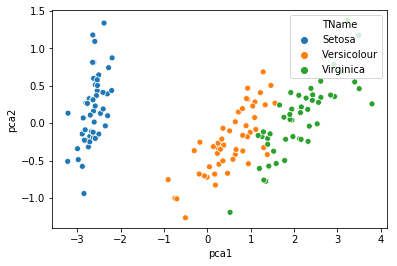

In [18]:
sn.scatterplot(x = "pca1" , y = "pca2", hue= "TName" , data= df , )
plt.legend(loc = 1 )

# 4 Model building

## Spliting data

In [21]:
df.head()

,pca1,pca2,Target,TName
0,-2.684126,0.319397,0.0,Setosa
1,-2.714142,-0.177001,0.0,Setosa
2,-2.888991,-0.144949,0.0,Setosa
3,-2.745343,-0.318299,0.0,Setosa
4,-2.728717,0.326755,0.0,Setosa


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [29]:
train_x , test_x , train_y , test_y = train_test_split(df[["pca1" , "pca2"]]  , df["Target"], train_size = 80)

In [30]:
train_y.value_counts()

1.0    29
2.0    29
0.0    22
Name: Target, dtype: int64

In [31]:
test_y.value_counts()

0.0    28
2.0    21
1.0    21
Name: Target, dtype: int64

## Model with PCA

In [65]:
train_x , test_x , train_y , test_y = train_test_split(df[["pca1" , "pca2"]]  , df["Target"], train_size = 80)
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x , train_y)
print(KNN.score(test_x , test_y))

0.9857142857142858


## Model without PCA

In [62]:
train_x , test_x , train_y , test_y = train_test_split(data.data , data.target, train_size = 80)
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(train_x , train_y)
print(KNN.score(test_x , test_y))

0.9857142857142858
